In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
# replacing blanks with 0 as tenure is 0 and not total charges are recorded
# changing the datatype with float as totalcharges recorded are object

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df["customerID"].duplicated().sum()

0

In [ ]:
# converting 0 and 1 values of senior citizen to "yes" / "no" to make it easier to understand.

In [13]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [15]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


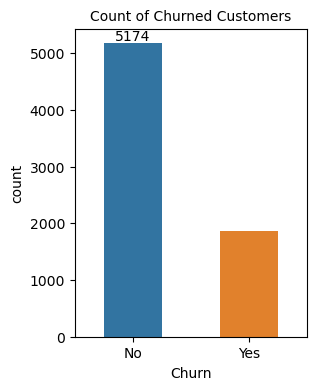

In [17]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = "Churn",hue ="Churn",data = df, width=0.5,palette = {"No": "#1f77b4", "Yes": "#ff7f0e"})
ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customers",fontsize = 10)
plt.show()

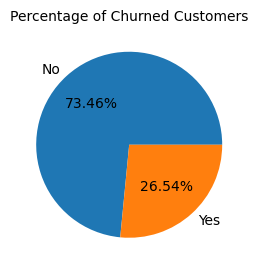

In [19]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

In [ ]:
# from the given pie chart we can conclude that 26.54% of our customers have churned out 
# now let's explore the reason behind it

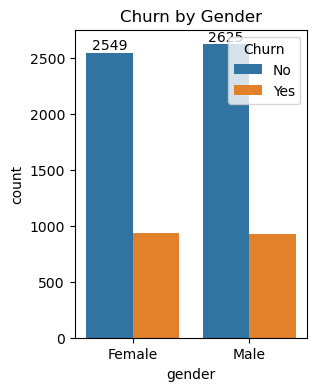

In [21]:
plt.figure(figsize=(3,4))
ax1 = sns.countplot(x = "gender",data = df,hue="Churn")
ax1.bar_label(ax1.containers[0])
plt.title("Churn by Gender")
plt.show()

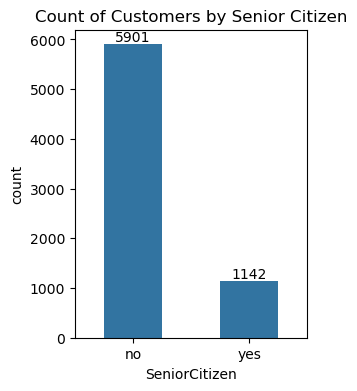

In [25]:
plt.figure(figsize=(3,4))
ax1 = sns.countplot(x = "SeniorCitizen",data = df,width = 0.5)
ax1.bar_label(ax1.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

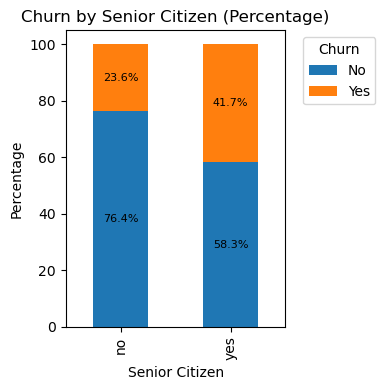

In [27]:
# Step 1: Group and calculate percentages
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 2: Define custom colors for 'Churn' categories
palette = {"No": "#1f77b4", "Yes": "#ff7f0e"}
colors = [palette[churn_status] for churn_status in percentages.columns]

# Step 3: Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, color=colors, figsize=(4, 4))

# Set labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Senior Citizen')
ax.set_title('Churn by Senior Citizen (Percentage)')
ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels to each segment
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Compartive a larger percentage of people in senior citizen category have chunred out.

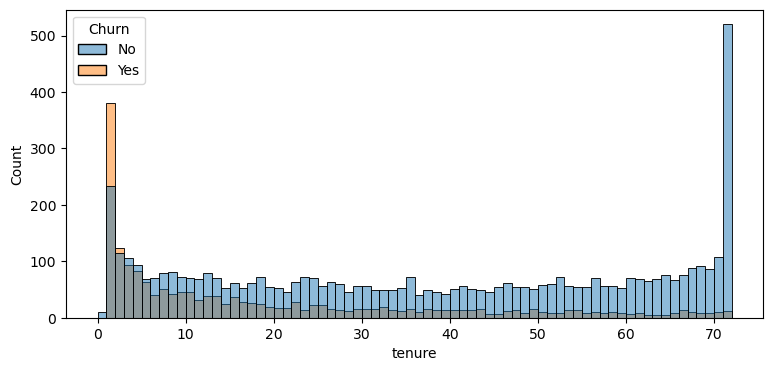

In [41]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df,bins=72, hue = "Churn")
plt.show()

In [ ]:
# people who have used our services for a long time have stayed and people who have used our services 
# 1 or 2 months have churned

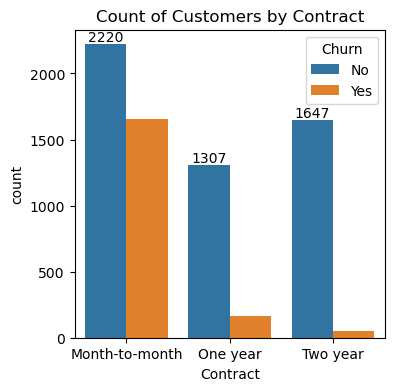

In [47]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
# people who have month to month contract are likely to churn then from those who have 1 or 2
# year contract.

In [54]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

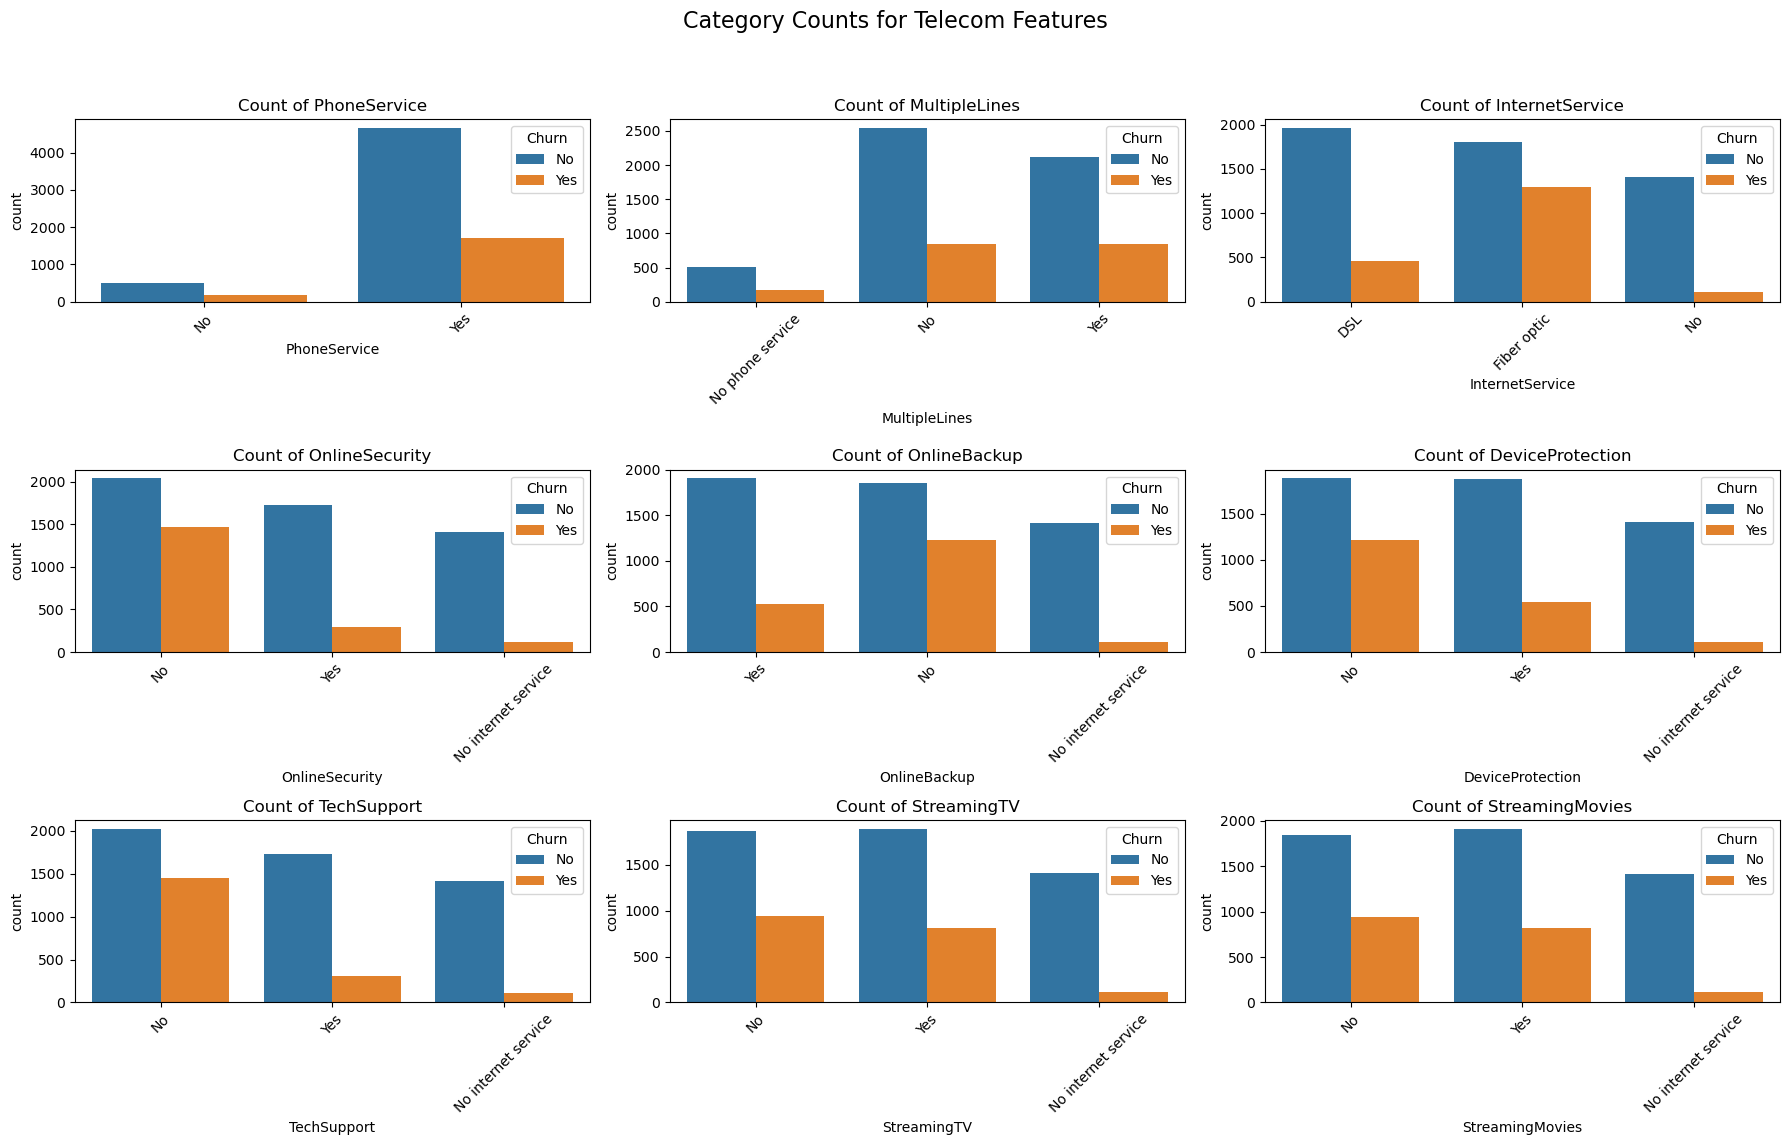

In [62]:
# List of categorical columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the plot grid (3 rows x 3 columns for 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Category Counts for Telecom Features', fontsize=16)

# Flatten axes to iterate easily
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue = "Churn")
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [64]:
# the majority of customers who do not churn trend to have services like phoneservices, internetservices
# (particularly(DSL)) and online security enabled. online backup, techsupport, and streaming tv
# , churn rates are noticeably higher when these services are not used or are unavailable.

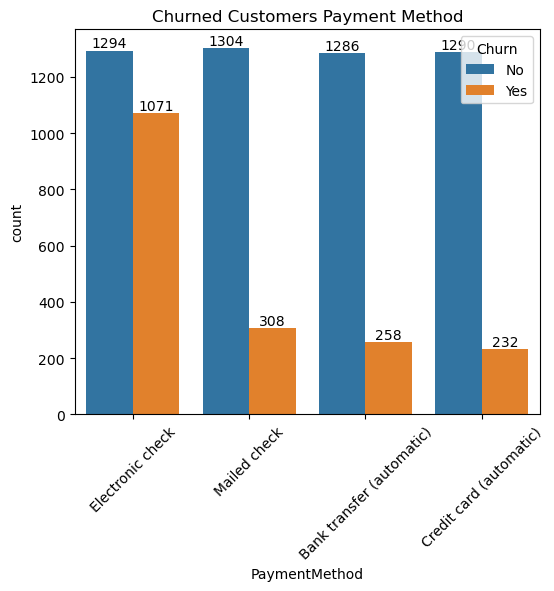

In [78]:
plt.figure(figsize =(6,5))
ax = sns.countplot(x = 'PaymentMethod',data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers Payment Method")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# customer is likely to churn when he is using electronic check  as a payment method.